In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

df = pd.read_csv("data_ex.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   20 non-null     int64  
 1   Month   20 non-null     int64  
 2   data    20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


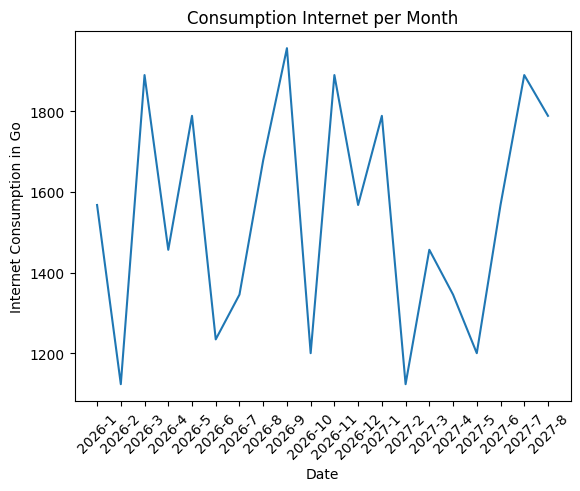

In [4]:
# Sort the DataFrame by 'Years' and 'Month'
df = df.sort_values(['Years', 'Month'])

# Data Display
plt.plot(df['Years'].astype(str) + '-' + df['Month'].astype(str), df['data'])
plt.title('Consumption Internet per Month')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.show()


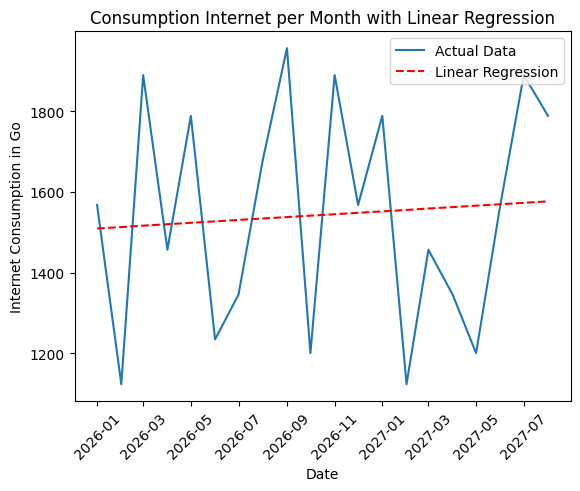

Mean Squared Error (MSE): 75050.08688081201
R-squared (R²): 0.005522853620713919


In [5]:
# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Préparation des données pour la régression linéaire
X = np.arange(len(df)).reshape(-1, 1)
y = df['data'].values.reshape(-1, 1)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X, y)

# Prédiction sur l'ensemble de données
y_pred = model.predict(X)

# Calcul de la Mean Squared Error (MSE) et du coefficient de détermination (R²)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Affichage des résultats de la régression linéaire
plt.plot(df['Date'], df['data'], label='Actual Data')
plt.plot(df['Date'], y_pred, label='Linear Regression', linestyle='--', color='red')
plt.title('Consumption Internet per Month with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Affichage de la MSE et du R²
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


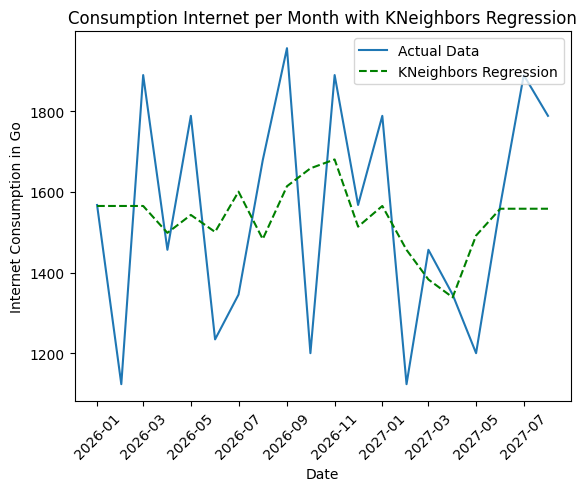

Mean Squared Error (KNN): 66309.37687219997
R-squared (KNN): 0.12134465620567225


In [6]:
# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Préparation des données pour la régression
X = np.arange(len(df)).reshape(-1, 1)
y = df['data'].values

# Création du modèle de régression par les k plus proches voisins (KNeighborsRegressor)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entraînement du modèle
knn_model.fit(X, y)

# Prédiction sur l'ensemble de données
y_pred_knn = knn_model.predict(X)

# Calcul de la Mean Squared Error (MSE) et du coefficient de détermination (R²) pour le modèle KNeighborsRegressor
mse_knn = mean_squared_error(y, y_pred_knn)
r2_knn = r2_score(y, y_pred_knn)

# Affichage des résultats de la régression par les k plus proches voisins
plt.plot(df['Date'], df['data'], label='Actual Data')
plt.plot(df['Date'], y_pred_knn, label='KNeighbors Regression', linestyle='--', color='green')
plt.title('Consumption Internet per Month with KNeighbors Regression')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Affichage de la MSE et du R² pour le modèle KNeighborsRegressor
print(f'Mean Squared Error (KNN): {mse_knn}')
print(f'R-squared (KNN): {r2_knn}')


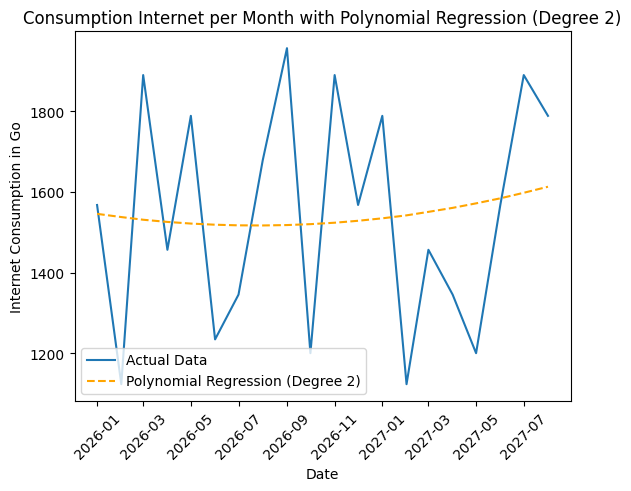

Mean Squared Error (Polynomial): 74693.19109579382
R-squared (Polynomial): 0.010252024719520914


In [7]:
# Préparation des données pour la régression polynomiale d'ordre 2
X = np.arange(len(df)).reshape(-1, 1)
y = df['data'].values.reshape(-1, 1)

# Création de caractéristiques polynomiales
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Création du modèle de régression linéaire
poly_model = LinearRegression()

# Entraînement du modèle
poly_model.fit(X_poly, y)

# Prédiction sur l'ensemble de données
y_pred_poly = poly_model.predict(X_poly)

# Calcul de la Mean Squared Error (MSE) et du coefficient de détermination (R²) pour la régression polynomiale
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

# Affichage des résultats de la régression polynomiale
plt.plot(df['Date'], df['data'], label='Actual Data')
plt.plot(df['Date'], y_pred_poly, label='Polynomial Regression (Degree 2)', linestyle='--', color='orange')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree 2)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Affichage de la MSE et du R² pour la régression polynomiale
print(f'Mean Squared Error (Polynomial): {mse_poly}')
print(f'R-squared (Polynomial): {r2_poly}')


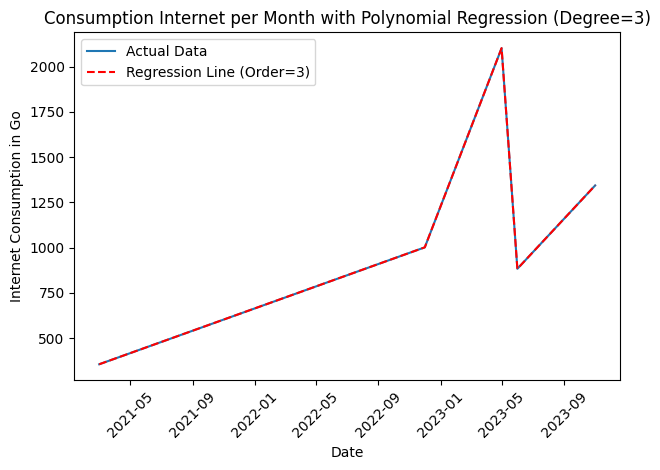

Mean Squared Error (MSE): 7.180968155074507e-22
R-squared (R²): 1.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
df = pd.read_csv("data.csv")

# Trier le DataFrame par 'Years' et 'Month'
df = df.sort_values(['Years', 'Month'])

# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Utiliser la date comme index
df.set_index('Date', inplace=True)

# Créer des caractéristiques polynomiales
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_poly, df['data'])

# Préparer des données pour la régression (pour affichage)
X_plot = np.arange(len(df) + 12).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
regression_line = model.predict(X_plot_poly)

# Affichage des données et de la régression sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, regression_line[:len(df)], label='Regression Line (Order=3)', linestyle='--', color='red')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree=3)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcul du Mean Squared Error (MSE) et du coefficient de détermination (R²)
y_pred = model.predict(X_poly)
mse = mean_squared_error(df['data'], y_pred)
r2 = r2_score(df['data'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


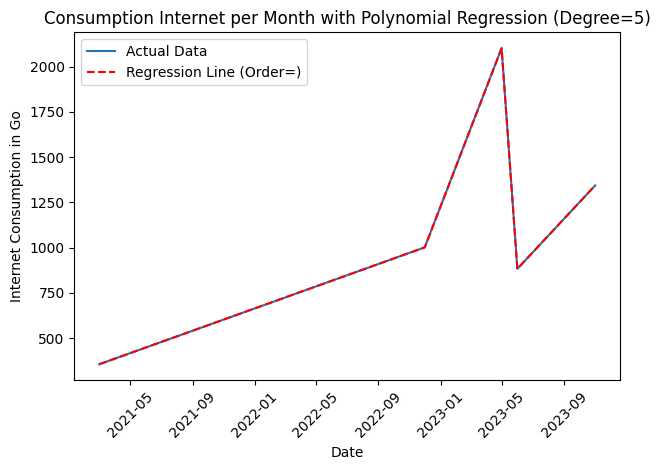

Mean Squared Error (MSE): 1.2039678439194674e-22
R-squared (R²): 1.0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
df = pd.read_csv("data.csv")

# Trier le DataFrame par 'Years' et 'Month'
df = df.sort_values(['Years', 'Month'])

# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Utiliser la date comme index
df.set_index('Date', inplace=True)

# Créer des caractéristiques polynomiales
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_poly, df['data'])

# Préparer des données pour la régression (pour affichage)
X_plot = np.arange(len(df) + 12).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
regression_line = model.predict(X_plot_poly)

# Affichage des données et de la régression sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, regression_line[:len(df)], label='Regression Line (Order=)', linestyle='--', color='red')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree=5)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcul du Mean Squared Error (MSE) et du coefficient de détermination (R²)
y_pred = model.predict(X_poly)
mse = mean_squared_error(df['data'], y_pred)
r2 = r2_score(df['data'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


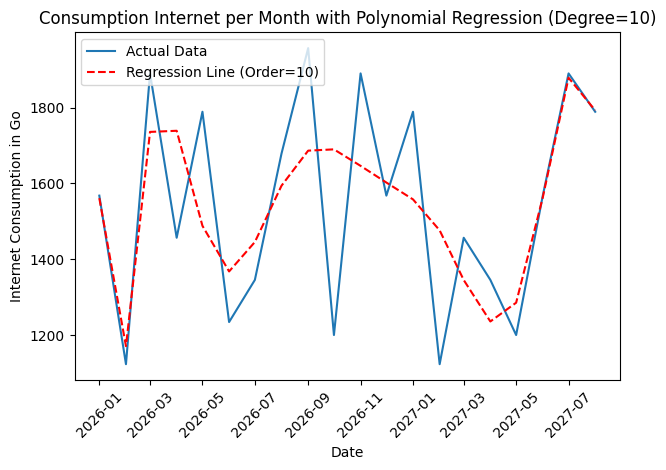

Mean Squared Error (MSE): 40710.81138987312
R-squared (R²): 0.4605473061998897
Prédictions pour les 12 prochains mois:
2027-09-30    1.399051e+03
2027-10-31    3.909175e+03
2027-11-30    2.167845e+04
2027-12-31    8.812257e+04
2028-01-31    2.789771e+05
2028-02-29    7.475955e+05
2028-03-31    1.780472e+06
2028-04-30    3.880946e+06
2028-05-31    7.891107e+06
2028-06-30    1.516431e+07
2028-07-31    2.780346e+07
2028-08-31    4.898322e+07
Freq: M, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
df = pd.read_csv("data_ex.csv")

# Trier le DataFrame par 'Years' et 'Month'
df = df.sort_values(['Years', 'Month'])

# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Utiliser la date comme index
df.set_index('Date', inplace=True)

# Créer des caractéristiques polynomiales
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_poly, df['data'])

# Préparer des données pour la régression (pour affichage)
X_plot = np.arange(len(df) + 12).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
regression_line = model.predict(X_plot_poly)

# Affichage des données et de la régression sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, regression_line[:len(df)], label='Regression Line (Order=10)', linestyle='--', color='red')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree=10)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcul du Mean Squared Error (MSE) et du coefficient de détermination (R²)
y_pred = model.predict(X_poly)
mse = mean_squared_error(df['data'], y_pred)
r2 = r2_score(df['data'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Prévoir les 12 prochains mois
X_future = np.arange(len(df), len(df) + 12).reshape(-1, 1)
X_future_poly = poly.transform(X_future)
y_future_pred = model.predict(X_future_poly)

# Afficher les prédictions pour les 12 prochains mois
future_dates = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]
future_predictions = pd.Series(y_future_pred, index=future_dates)

print("Prédictions pour les 12 prochains mois:")
print(future_predictions)


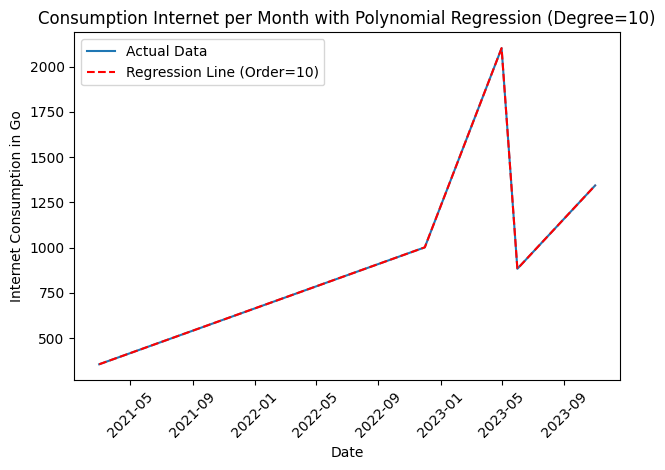

Mean Squared Error (MSE): 2.841327728627688e-20
R-squared (R²): 1.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
df = pd.read_csv("data.csv")

# Trier le DataFrame par 'Years' et 'Month'
df = df.sort_values(['Years', 'Month'])

# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Utiliser la date comme index
df.set_index('Date', inplace=True)

# Créer des caractéristiques polynomiales
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_poly, df['data'])

# Préparer des données pour la régression (pour affichage)
X_plot = np.arange(len(df) + 12).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
regression_line = model.predict(X_plot_poly)

# Affichage des données et de la régression sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, regression_line[:len(df)], label='Regression Line (Order=10)', linestyle='--', color='red')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree=10)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcul du Mean Squared Error (MSE) et du coefficient de détermination (R²)
y_pred = model.predict(X_poly)
mse = mean_squared_error(df['data'], y_pred)
r2 = r2_score(df['data'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


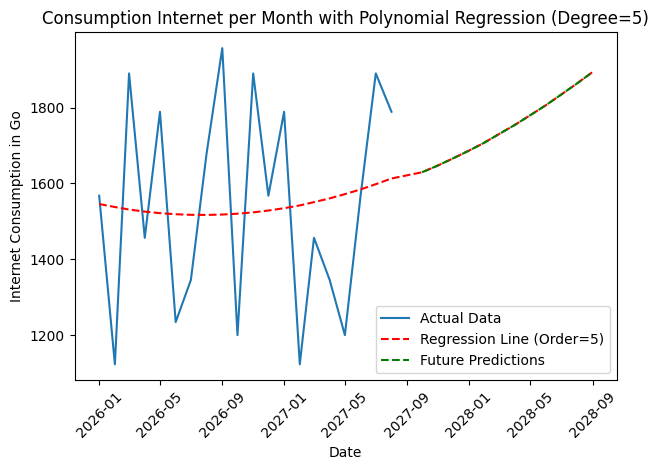

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Charger les données
df = pd.read_csv("data_ex.csv")

# Trier le DataFrame par 'Years' et 'Month'
df = df.sort_values(['Years', 'Month'])

# Convertir 'Years' et 'Month' en une seule colonne de date
df['Date'] = pd.to_datetime(df['Years'].astype(str) + '-' + df['Month'].astype(str))

# Utiliser la date comme index
df.set_index('Date', inplace=True)

# Créer des caractéristiques polynomiales
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(np.arange(len(df)).reshape(-1, 1))

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_poly, df['data'])

# Prédire la consommation future
future_months = 12  # Nombre de mois à prédire
last_month = df.index.max()

# Créer des nouvelles dates pour les mois futurs
future_dates = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=future_months, freq='M')

# Créer des caractéristiques polynomiales pour les mois futurs
X_future_poly = poly.transform(np.arange(len(df), len(df) + future_months).reshape(-1, 1))

# Prédire la consommation pour les mois futurs
future_predictions = model.predict(X_future_poly)

# Afficher les prédictions pour les mois futurs
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Consumption': future_predictions})
future_df.set_index('Date', inplace=True)

# Concaténer les données réelles et les prédictions
df = pd.concat([df, future_df])

# Affichage des données et de la régression sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, model.predict(poly.transform(np.arange(len(df)).reshape(-1, 1))), label='Regression Line (Order=5)', linestyle='--', color='red')
plt.plot(future_df.index, future_df['Predicted Consumption'], label='Future Predictions', linestyle='--', color='green')
plt.title('Consumption Internet per Month with Polynomial Regression (Degree=5)')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [2]:
# Utiliser une moyenne mobile pour prédire les valeurs futures
window_size = 3
df['Moving_Avg'] = df['data'].rolling(window=window_size).mean()

# Affichage des données, de la régression, et de la moyenne mobile sur le graphique
plt.plot(df.index, df['data'], label='Actual Data')
plt.plot(df.index, model.predict(poly.transform(np.arange(len(df)).reshape(-1, 1))), label='Linear Regression (Order=1)', linestyle='--', color='red')
plt.plot(df.index, df['Moving_Avg'], label=f'Moving Average (Window={window_size})', linestyle='--', color='green')
plt.title('Consumption Internet per Month with Linear Regression and Moving Average')
plt.xlabel('Date')
plt.ylabel('Internet Consumption in Go')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined